<div style="text-align:center;display:block">
<b style="color:blue;font-size:200%; font-family:serif">Dimension reduction</b>

<img src="images/pca_title.png" style="margin:0 auto; width:70%">

TC, BN, JBM, AZ
<br>
</div>

<div class="footer">
Institut Pasteur, Paris, 20-31 March 2017
</div>



$$corr(x_1,x_2) = \sum \frac{(x_1i - \mu_1)(x_2i - \mu_2)}{\sqrt{s_1} \sqrt{s_1}}$$

In [2]:
%matplotlib inline
from pylab import *
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,6)

# Multivariate problems

> - In multivariate problems, exploratory analysis is paramount
> - Is the data random or can we see patterns ?
> - Can we visualize the data
> - Can we discover subgroups amongst the variables or observations ?

> One way to answer those questions it to use principal component analysis known as **PCA**. 

> - The main goal of a PCA analysis is to identify patterns in data
> - PCA aims to detect the correlation between variables. 


# PCA can help us in discovering hidden patterns

<div>
<img src="images/projection.jpg">
</div>

> - also to reduce high dimensionality problems,
> - identify variables with highest variance
> - compression

# From univariate to multivariate problem

# Univariate example
distribution of gene expression, distribution of human heights, distribution of length of sepals, distribution of drug response ...

The following 3 slides can be exercices

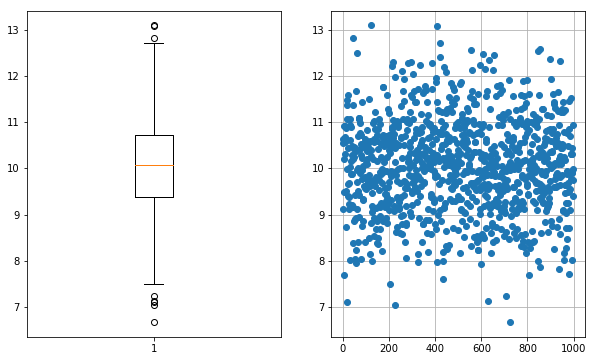

In [3]:
# Generally, normally distributed (not always of course). Example of
# noramlly distributed data centered around 10 with variance equal to 1
y = 10 + randn(1000)
subplot(1,2,1); _ = boxplot(y)
subplot(1,2,2); _ = plot(y, "o"); grid(True)

## bivariate example

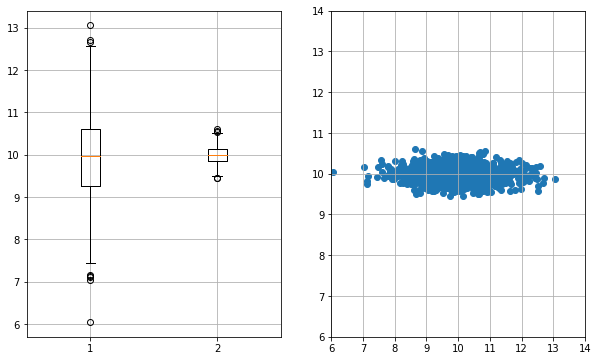

In [4]:
x1 = 10 + randn(1000)
x2 = 10 + 0.2 * randn(1000)
data2 = np.vstack([x1, x2])
subplot(1,2,1); 
boxplot([x1, x2]); grid(True)
subplot(1,2,2); 
scatter(x1,x2); xlim([6,14]); ylim([6,14]); grid(True)

## Multivariate example (3D)

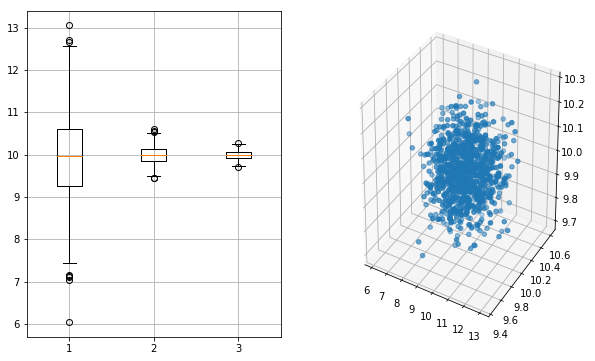

In [5]:
from mpl_toolkits.mplot3d import Axes3D
x3 = 10 + 0.1 * randn(1000)
# Note that to combine 2D and 3D plots, you must use the add_subplot on 
# a Figure instance
fig = figure()
ax = fig.add_subplot(1,2,1); 
ax.boxplot([x1,x2,x3]); grid()
ax = fig.add_subplot(1,2,2, projection="3d"); 
ax.scatter(x1,x2, x3);
grid(True)

See the notebook called IRIS_3D_demo for an interactive DEMO

# Higher dimensions

> In 1, 2 or 3 dimensions, visual investigation is easy. We can quickly see 
whether variables are correlated or important. In higher dimensions, 
new tools are required.

> How do we represent / visualize data in 4D, 5D, ND?

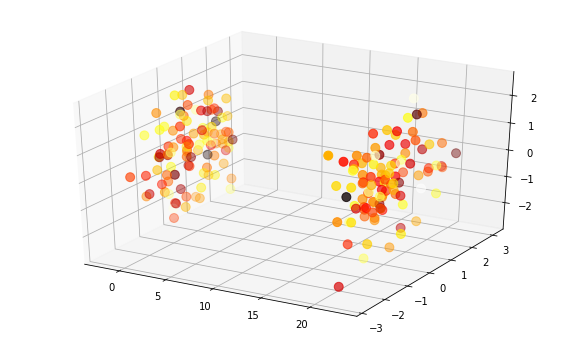

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.hstack([np.random.standard_normal(100), 
               20+np.random.normal(size=100)])
y = np.random.standard_normal(200)
z = np.random.standard_normal(200)
c = np.random.standard_normal(200)

ax.scatter(x, y, z, c=c, cmap=plt.hot(), s=80)
plt.show()


What about 5D, how would you represent it ?

With different size for each dot

# PCA example in 2D

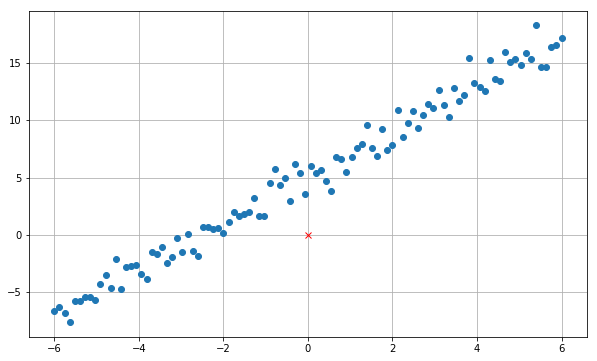

In [8]:
# Here we have 2 variables and N=100 samples
X = np.linspace(-6, 6, 100)
Y = 5 + 2*X + np.random.normal(size=100)
data = np.array([X,Y]).transpose()
plot(X, Y, "o", 0, 0, "xr"); grid(True)

# The PCA analysis with sklearn

The PCA algorithm identifies the directions of maximum variance in high-dimensional data by combining attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

In [9]:
from sklearn.decomposition import PCA
original_data = data.copy()
pca = PCA()
pca.fit(original_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_

array([ 62.31336552,   0.18752182])

In [11]:
pca.explained_variance_ratio_

array([ 0.99699969,  0.00300031])

So 99% of the variance can be explained by the first component of the PCA analysis ! This makes sense since we know that X and Y are highly correlated.

# Scaling the data

> - Variables may be measured in different units
> - Variable with larger variance is more likely to influence the PCA
> - scaling is just centering and dividing by the standard deviation

Exo: create 3 variables with mean = -10,0,10 and standard deviation of 1,3,9
    plot boxplot, scale them and plot boxplot again

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
data = scale(data)
pca = PCA()
pca.fit(data)
pca.explained_variance_ratio_

array([ 0.9952294,  0.0047706])

Note that when scaled, the explained_variance total variance is equal to the 
number of observations (here 2)

In [15]:
pca.explained_variance_

array([ 1.9904588,  0.0095412])

# Transforming the data from original space to PCA space

the PCA analysis projects the data on new axis so as to minimize the variance

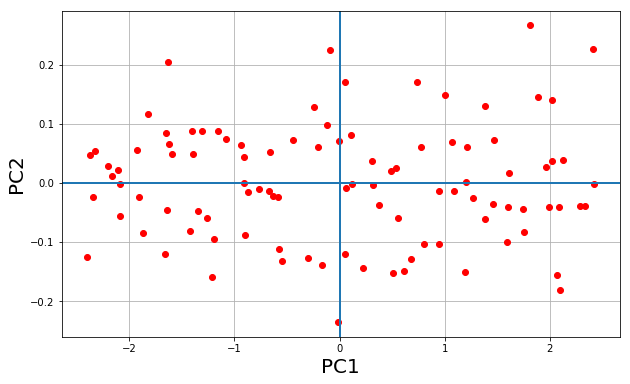

In [20]:
Xr = pca.transform(data)
plot(Xr[:,0], Xr[:,1], "ro")
grid()
xlabel("PC1", fontsize=20)
ylabel("PC2", fontsize=20)
axvline(0, lw=2); axhline(0, lw=2)

The PCA axis can be characterised by the explained variance and the components
of the 

In [31]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**components**: Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by
``explained_variance_``.

In [28]:
pca.explained_variance_ratio_

array([ 0.9952294,  0.0047706])

# The PC vectors can be plotted back in the original space

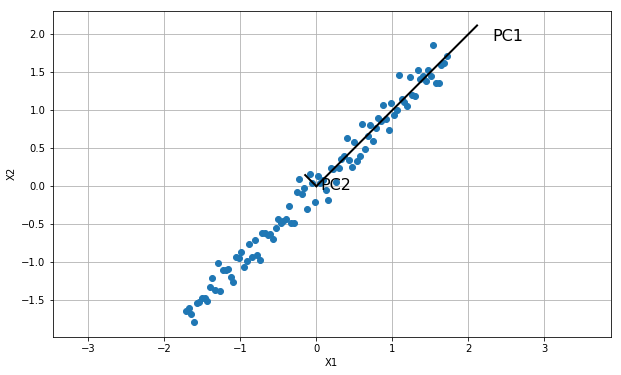

In [18]:
#Xnew = pca.inverse_transform(Xr)
plot(data[:,0], data[:,1], "o"); 
count = 0
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plot([0,v[0]], [0,v[1]], "k", lw=2)
    text(v[0]+0.2, v[1]-.2, "PC%s" % (count+1), fontsize=16)
    count += 1
plt.axis('equal'); grid(); xlabel("X1"); ylabel("X2")

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

# Compression (select first components)

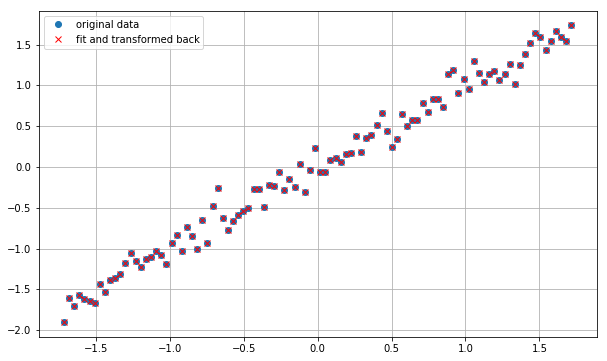

In [112]:
pca = PCA(n_components=2)
pca.fit(data)
Xr = pca.transform(data)
Xnew = pca.inverse_transform(Xr)
plot(data[:,0], data[:,1], "o", label="original data"); 
plot(Xnew[:,0], Xnew[:,1], "rx", label="fit and transformed back")
legend()
grid()

If we use all PCA components (here 2 components) we can transform the data into the PCA
space and back into the original space. We do not lose information.

<div class="practical">
<h1>Compression</h1>
</div>

When performing the PCA, we can restrict the number of components. In such case, when we transform
back into the original space, we remove variance. In our example, it means we project
the 2D data on a 1D space (the first PC direction).

> Redo the previous example setting the number of components 
to 1 instead of 2. What do you see ?

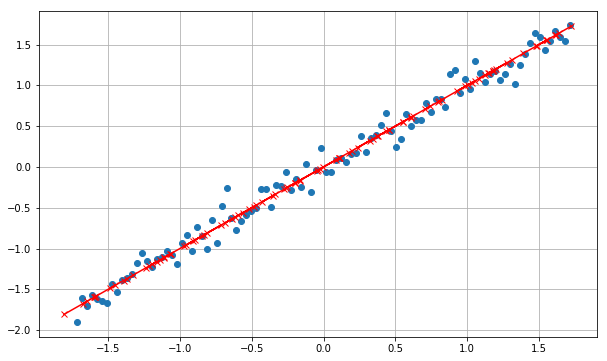

In [89]:
pca = PCA(n_components=1)
pca.fit(data)
Xr = pca.transform(data)
Xnew = pca.inverse_transform(Xr)
plot(data[:,0], data[:,1], "o"); 
plot(Xnew[:,0], Xnew[:,1], "r-x")
grid()

# IRIS examples (4 variables)

The problem: measurements of 4 variables on 3 types of iris flowers. Are those 
    variables pertinent ? Do we need all of them. Which one(s) can be used to 
    classify the 3 species ?

<div>
<table>
<tr><td>versicolor</td><td>virginica</td><td>setosa</td></tr>
<tr><td><img src="images/iris_versicolor.jpg" style="width:160%"></td>
<td><img src="images/iris_virginica.jpg" style="width:80%"></td>
<td><img src="images/iris_setosa.jpg" style="width:100%"></td>
</tr>
</table>

</div>

In [93]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
colors = {0:"navy", 1:"turquoise", 2:"darkorange"}
df["target"] = iris['target']
df['color'] = df.target.apply(lambda x:colors[x])
df['target_names'] = df.target.apply(lambda x: iris['target_names'][x])
features = df.columns[0:4]

<div class="practical">
<h1>Explore the iris data sets </h1>
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c22199470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8c21863630>]], dtype=object)

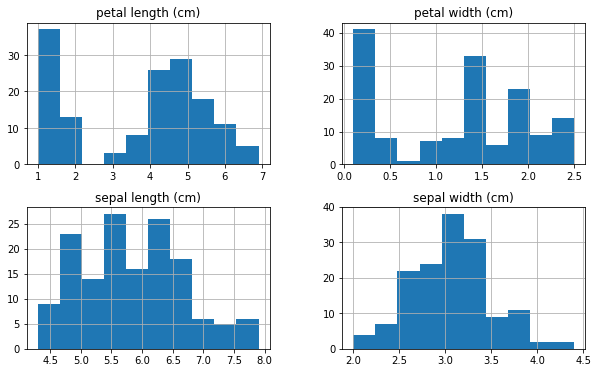

In [94]:
df[features].hist()

In [41]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,color
37,4.9,3.1,1.5,0.1,0,navy
74,6.4,2.9,4.3,1.3,1,turquoise
88,5.6,3.0,4.1,1.3,1,turquoise
53,5.5,2.3,4.0,1.3,1,turquoise
38,4.4,3.0,1.3,0.2,0,navy
128,6.4,2.8,5.6,2.1,2,darkorange
61,5.9,3.0,4.2,1.5,1,turquoise
142,5.8,2.7,5.1,1.9,2,darkorange
28,5.2,3.4,1.4,0.2,0,navy
83,6.0,2.7,5.1,1.6,1,turquoise


See IRIS_3D_demo
<img src="images/pca_title.png" style="margin:0 auto; width:70%">


# The PCA analysis on the IRIS data

<div class="practical">
<h1>PCA on IRIS data</h1>
</div>

> - Using the IRIS data (without the label), perform a PCA analysis
> - plot the explained variance ratio values and the cumulative sum of the explained variance ratio.

In [97]:
from sklearn import decomposition
from sklearn.preprocessing import scale
    
pca = decomposition.PCA(n_components=4)

X = df[features].copy()
X = scale(X)

pca.fit(X)
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

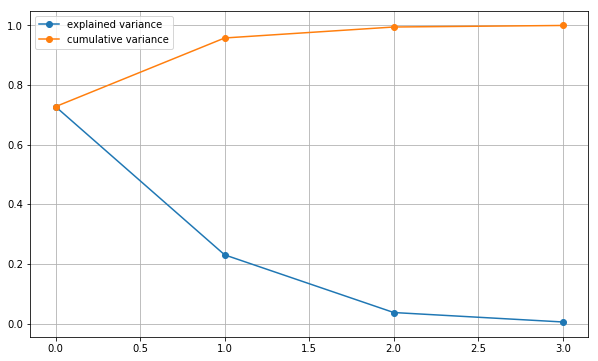

In [98]:
plot(pca.explained_variance_ratio_, "-o", label="explained variance")
plot(cumsum(pca.explained_variance_ratio_), "o-", 
     label="cumulative variance")
legend()
grid()

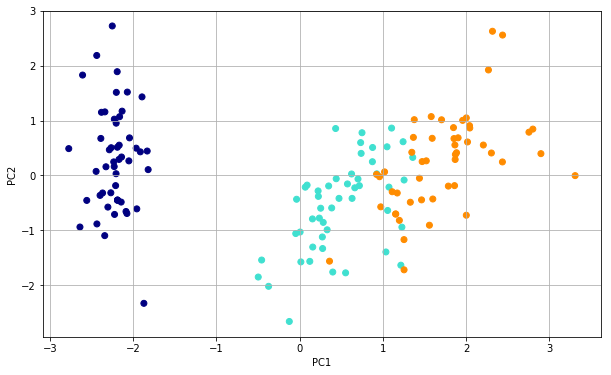

In [99]:
Xr = pca.transform(X)
scatter(Xr[:,0], Xr[:,1], color=df.color.values)
xlabel("PC1"); 
ylabel("PC2"); 
grid()

# What is the impact of a constant feature 

<div class="practical">
<h1>Impact of dummy variable</h1>
</div>

> - add a column to the IRIS dataframe with a constant feature (e.g. 10)
> - Fit a PCA on the 5 features 
> - checkout the explained variance ratio

In [100]:
pca = decomposition.PCA(n_components=5)
subdf['noise'] = [10] * 150
pca.fit(scale(subdf))
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193,  0.        ])


# By the way, how does it work ?

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: 

The eigenvectors (principal components) determine the directions of the new feature space

The eigenvalues determine their magnitude (explain the variance of the data along the new feature axes).


In [102]:
X = df[features].copy()
X = scale(X)
U, S, V = np.linalg.svd(X.T)
-U.T


array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [100]:
# eigenvalues
S**2/sum(S**2)

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

# Summary

- PCA can be used to reduce high dimensional data sets
- Can be used for classification to separate classes
- cumulative variance can be used to set the fraction of variance to be captured.


## Restrictions:
    
 - we assume the biological question is related to the highest variances. Not 
   robust for strongly non gaussian processes
 - orthogonality constraints --> ICA
 - PCA adapted for continuous data only
 - If not, need to study link between qualitative variables such as correpondence factor (2 variables) analysis of multiple factor analysis (more than 2)

References:
    
- https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-pca.ipynb
- scikit learn :   http://scikit-learn.org/stable/modules/decomposition.html#pca
- https://plot.ly/ipython-notebooks/principal-component-analysis/

# LCA

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[features].copy()
X = scale(X)
y = df.target.copy()

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))


explained variance ratio (first two components): [ 0.72770452  0.23030523]
explained variance ratio (first two components): [ 0.99147248  0.00852752]


**NB:** Number of components in LDA must be (< n_classes - 1). Here at most 2  (3 classes -1).

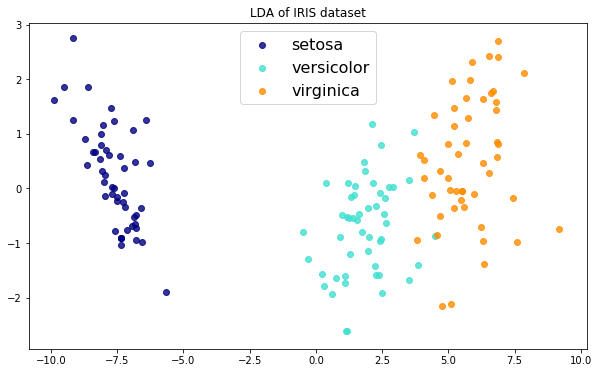

In [110]:
figure()
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
legend(loc='best',  scatterpoints=1, fontsize=16)
title('LDA of IRIS dataset')


# ICA (Independent component analysis)

PCA is not robust against non gaussian data or non orthogonal data.

Instead, we can use ICA. Note, however, that ICA is not used for reducing dimensionality but for separating superimposed signals.

ICA is an algorithm that finds directions in the feature space corresponding to projections with high non-Gaussianity. These directions need not be orthogonal in the original feature space, but they are orthogonal in the whitened feature space, in which all directions correspond to the same variance.

reference: http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py

## The data

In [112]:
rng = np.random.RandomState(42)
S_true = rng.standard_t(1.5, size=(20000, 2))
S_true[:, 0] *= 2.
#S_true /= S_true.std()

#angle = np.pi/3
#A = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix [new X = x+y; new Y = 2 y]
X = np.dot(S_true, A.T)         # Generate observations

In [113]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=5, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)
    plt.hlines(0, -6, 6);    plt.vlines(0, -6, 6)
    plt.xlim(-6, 6);         plt.ylim(-6,6)
    plt.xlabel('x');         plt.ylabel('y')
    grid()

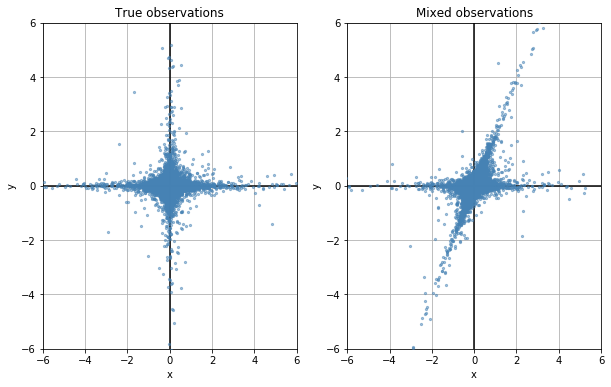

In [114]:
#original data
subplot(1,2,1); plot_samples(S_true/S_true.std()); title("True observations")
subplot(1,2,2); plot_samples(X/X.std()); title("Mixed observations")

In [115]:
pca = PCA()
pca.fit(X)
S_pca = pca.transform(scale(X))
pca.explained_variance_ratio_


array([ 0.79629979,  0.20370021])

Symetric data set but PCA gives us a 75/25 ratio. Why not ?

In [123]:
from sklearn.decomposition import PCA, FastICA
ica = FastICA()
ica.fit(X)
S_ica = ica.transform(X)
# Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. 
S_ica /= S_ica.std(axis=0)

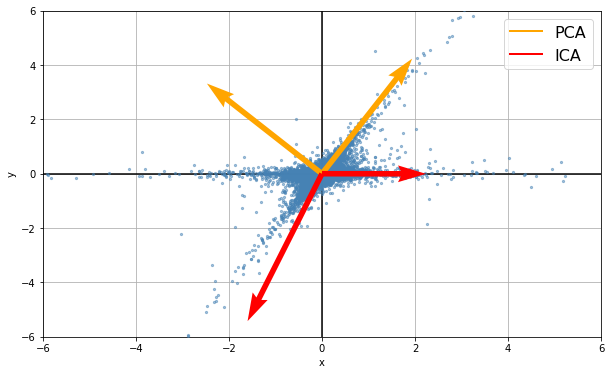

In [124]:
plot_samples(X/X.std(), axis_list=[pca.components_.T, -ica.mixing_])
legend(['PCA', 'ICA'], loc='upper right', fontsize=16)

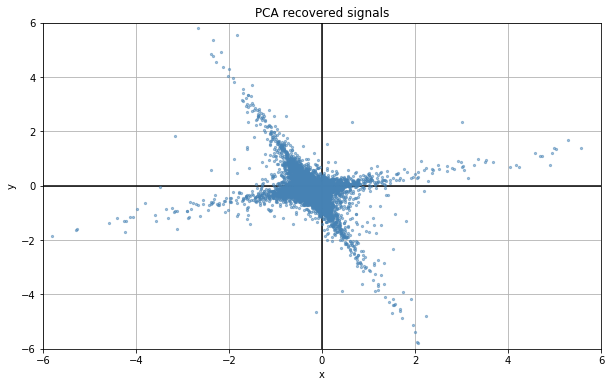

In [125]:
plot_samples(S_pca / np.std(S_pca, axis=0))
title("PCA recovered signals")

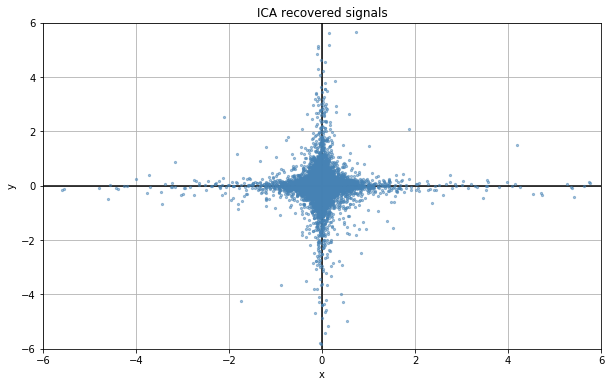

In [126]:
plot_samples(S_ica / np.std(S_ica))
title("ICA recovered signals")